Лабораторная работа №1

Ссылки на датасеты

Классификация: https://www.kaggle.com/datasets/adityakadiwal/water-potability

Регрессия: https://www.kaggle.com/datasets/maajdl/yeh-concret-data

## 1. Выбор начальных условий

### 1a. Обоснование выбора датасета для классификации

**Датасет для классификации: Water Potability**

Определение пригодности воды для употребления человеком критично для охраны общественного здоровья и устойчивого развития: загрязнённая вода вызывает острые и хронические заболевания, особенно у уязвимых групп, и приводит к значительным экономическим потерям. На фоне урбанизации, изменения климата и интенсивного использования химикатов регулярный мониторинг качества и оперативная идентификация рисков позволяют своевременно принимать превентивные меры, защищать население и рационально распределять ресурсы. Применение методов машинного обучения к большим наборам наблюдений способствует автоматизации контроля качества питьевой воды, повышению точности прогнозов.

### 1b. Обоснование выбора датасета для регрессии

**Датасет для регрессии: Concrete Compressive Strength**

Определение прочности бетонной смеси на сжатие имеет ключевое значение для обеспечения безопасности и долговечности строительных конструкций, оптимизации проектных решений и снижения затрат: точные прогнозы позволяют корректировать состав смеси и технологию производства до выпуска образцов, уменьшать число дорогостоящих испытаний, своевременно выявлять риск разрушений и продлевать срок службы сооружений.

### 1c. Выбор и обоснование метрик качества

**Метрики для классификации (Water Potability):**
1. **Accuracy** — общая точность модели (процент правильных предсказаний).
2. **Precision** — доля положительных предсказаний, которые были верными (важно избегать ложноположительных — объявить воду пригодной, когда она опасна).
3. **Recall (Sensitivity)** — доля всех положительных примеров, которые модель правильно предсказала (важно не пропустить опасную воду).
4. **F1** — гармоническое среднее между precision и recall (сбалансированная метрика).
5. **ROC-AUC** — площадь под ROC-кривой (оценивает способность модели различать классы на всех порогах).
6. **Confusion Matrix** — матрица ошибок для понимания типов ошибок (TP, FP, FN, TN).

Для классификации рассмотрим такие метрики как: accuracy, F1, ROC-AUC, PR-AUC

**Метрики для регрессии (Concrete Strength):**
1. **Mean Squared Error (MSE)** — среднеквадратическая ошибка (штрафует большие отклонения).
2. **Mean Absolute Error (MAE)** — средняя абсолютная ошибка (интерпретируема в единицах МПа).
3. **Root Mean Squared Error (RMSE)** — корень из MSE (в тех же единицах, что целевая переменная).
4. **R² Score** — коэффициент детерминации (доля объяснённой дисперсии).

Для регрессии рассмотрим такие метрики как: mae, mse, $R^2$

## 2. Создание бейзлайна и оценка качества

#### Проанализируем данные в датасетах

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, classification_report,
    precision_recall_curve, auc
    )
import warnings
warnings.filterwarnings('ignore')

Загрузим датасеты

In [2]:
# Загрузка данных
df_water = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])
df_concrete = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])
print(f"Размер данных (вода): {df_water.shape}")
print(f"Размер данных (бетон): {df_concrete.shape}")

Размер данных (вода): (3276, 11)
Размер данных (бетон): (1030, 9)


#### Анализ датасета для классификации

Выведем информацию о клонках датасета качества воды.

In [3]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3276 non-null   int64  
 1   ph               2785 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          2495 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3114 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Potability       3276 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 281.7 KB


Можем заметить, что есть значения, которые отличаются от остальных (ph, Sulfate, Trihalomethanes).

In [4]:
df_water.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Проверим есть ли в датасете классификации пропуски данных

In [5]:
print(f"Отсутствующие значения:\n{df_water.isnull().sum()}")

Отсутствующие значения:
Unnamed: 0           0
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Видим, что пропуски есть как раз по трем колонкам, которые обсуждали выше.

Проверим есть ли дубликаты данных

In [6]:
df_water[df_water.duplicated(keep=False) == True].count()

Unnamed: 0         0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Дубликатов в датасете для классификации нет

Проверим наличие дисбаланса классов

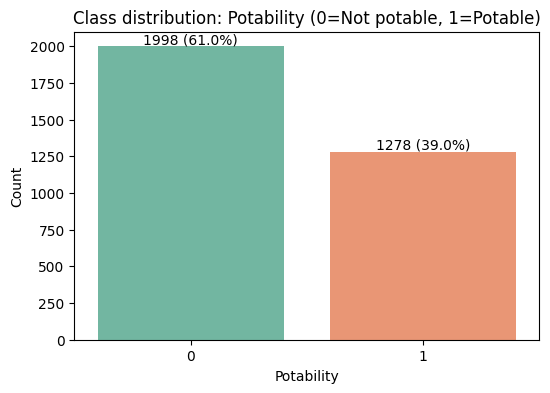

In [7]:
class_counts = df_water['Potability'].value_counts()
class_perc = df_water['Potability'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
sns.countplot(x='Potability', data=df_water, palette='Set2')
plt.title('Class distribution: Potability (0=Not potable, 1=Potable)')
plt.xlabel('Potability')
plt.ylabel('Count')

for i, v in enumerate(class_counts):
    plt.text(i, v + max(class_counts)*0.01, f'{v} ({class_perc.iloc[i]:.1f}%)', ha='center')
plt.show()

Видно, что присутсвует сильный дисбаланс классов. Данный показатель может сильно влиять на точность и качество модели.

#### Анализ датасета для регрессии

Посмотрим на данные

In [8]:
df_concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Нет тектовых признаков, все признаки имеют числовые значения

In [9]:
print(f"\nФорма: {df_concrete.shape}")
print(f"Отсутствующие значения:\n{df_concrete.isnull().sum()}")


Форма: (1030, 9)
Отсутствующие значения:
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


Пропусков нет

In [10]:
print(f"\nОписательная статистика целевой переменной:\n{df_concrete.iloc[:, -1].describe()}")


Описательная статистика целевой переменной:
count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: csMPa, dtype: float64


In [11]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Визуализация распределения целевой переменной

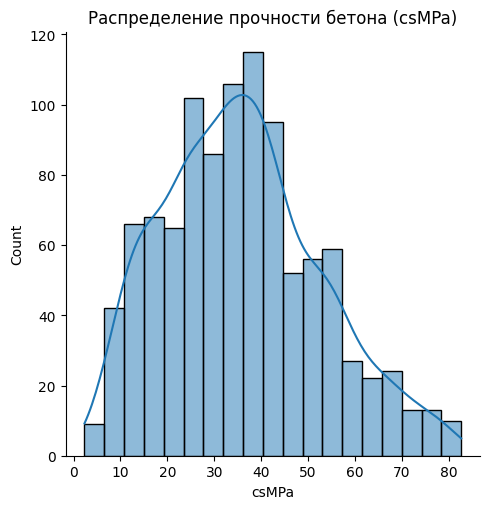

In [12]:
sns.displot(df_concrete['csMPa'], kde=True)
plt.title('Распределение прочности бетона (csMPa)')
plt.show()

In [13]:
df_concrete[df_concrete.duplicated(keep=False) == True].count()

cement              36
slag                36
flyash              36
water               36
superplasticizer    36
coarseaggregate     36
fineaggregate       36
age                 36
csMPa               36
dtype: int64

Можем заметить, в датасете есть дубликаты

### 2a. Обучение моделей

Для начала обучим модели на имеющихся данных без предварительного препроцессинга. 
Чтобы KNN работал без ошибок, удалим пропуски.

In [14]:
# удавление пропусков для классификации
df_water = df_water.dropna()
X_water = df_water.drop('Potability', axis=1)
y_water = df_water['Potability']

# удалние пропусков для регрессии
df_concrete = df_concrete.dropna()
X_concrete = df_concrete.iloc[:, :-1]
y_concrete = df_concrete.iloc[:, -1]

# Разделение на обучающую и тестовую выборки (без обработки пропусков пока)
X_train_water, X_test_water, y_train_water, y_test_water = train_test_split(
    X_water, y_water, test_size=0.3, random_state=42
)

X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(
    X_concrete, y_concrete, test_size=0.3, random_state=42
)

print(f"Water Potability - данные: X={X_water.shape}, y={y_water.shape}")
print(f"Concrete Strength - данные: X={X_concrete.shape}, y={y_concrete.shape}")
print(f"\nТренировочная выборка: Water {X_train_water.shape}, Concrete {X_train_concrete.shape}")
print(f"Тестовая выборка: Water {X_test_water.shape}, Concrete {X_test_concrete.shape}")

Water Potability - данные: X=(2011, 10), y=(2011,)
Concrete Strength - данные: X=(1030, 8), y=(1030,)

Тренировочная выборка: Water (1407, 10), Concrete (721, 8)
Тестовая выборка: Water (604, 10), Concrete (309, 8)


Обучаем модели

In [15]:
# Обучение модели классификации KNN
knn_clf_baseline = KNeighborsClassifier(n_neighbors=5)
knn_clf_baseline.fit(X_train_water, y_train_water)
y_pred_water_baseline = knn_clf_baseline.predict(X_test_water)
y_pred_proba_water_baseline = knn_clf_baseline.predict_proba(X_test_water)[:, 1]

# Обучение модели регрессии KNN
knn_reg_baseline = KNeighborsRegressor(n_neighbors=5)
knn_reg_baseline.fit(X_train_concrete, y_train_concrete)
y_pred_concrete_baseline = knn_reg_baseline.predict(X_test_concrete)

### 2b. Оценка качества моделей

Оценка качества классификации


Метрики качества (KNN, k=5):
  Accuracy:  0.5915
  Precision: 0.4348
  Recall:    0.3279
  F1-score:  0.3738
  ROC-AUC:   0.5377
  PR-AUC: 0.4219

Матрица ошибок:

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       412
           1       0.43      0.33      0.37       244

    accuracy                           0.59       656
   macro avg       0.54      0.54      0.54       656
weighted avg       0.57      0.59      0.58       656



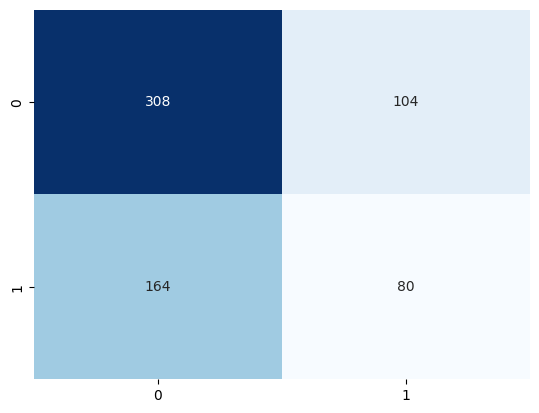

In [46]:
accuracy = accuracy_score(y_test_water, y_pred_water_baseline)
precision = precision_score(y_test_water, y_pred_water_baseline, zero_division=0)
recall = recall_score(y_test_water, y_pred_water_baseline, zero_division=0)
f1 = f1_score(y_test_water, y_pred_water_baseline, zero_division=0)
roc_auc = roc_auc_score(y_test_water, y_pred_water_baseline)
pr_curve = precision_recall_curve(y_test_water, y_pred_proba_water_baseline)
cm = confusion_matrix(y_test_water, y_pred_water_baseline)

pr_auc = auc(pr_curve[1], pr_curve[0])

print(f"\nМетрики качества (KNN, k=5):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC: {pr_auc:.4f}")

print(f"\nМатрица ошибок:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

print(f"\nОтчет о классификации:")
print(classification_report(y_test_water, y_pred_water_baseline))

Модель сильно ошибается. Ее ответы больше похожы на простое угадывание. Так как дисбалас сильный, смотрим на метрику F1 = 0.34 --- такой показатель достаточно низок, нужно улучшать точность модели.

Оценка качества регрессии

In [17]:
mse = mean_squared_error(y_test_concrete, y_pred_concrete_baseline)
mae = mean_absolute_error(y_test_concrete, y_pred_concrete_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_concrete, y_pred_concrete_baseline)

print(f"\nМетрики качества (KNN, k=5):")
print(f"  MSE:  {mse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


Метрики качества (KNN, k=5):
  MSE:  87.4024
  MAE:  7.2301
  RMSE: 9.3489
  R²:   0.6770


Получили следующие значения ошибок, попробуем их уменьшить

Сделаем визуализацию для моделей. Отобразим матрицу ошибок и разброс для модели регрессии

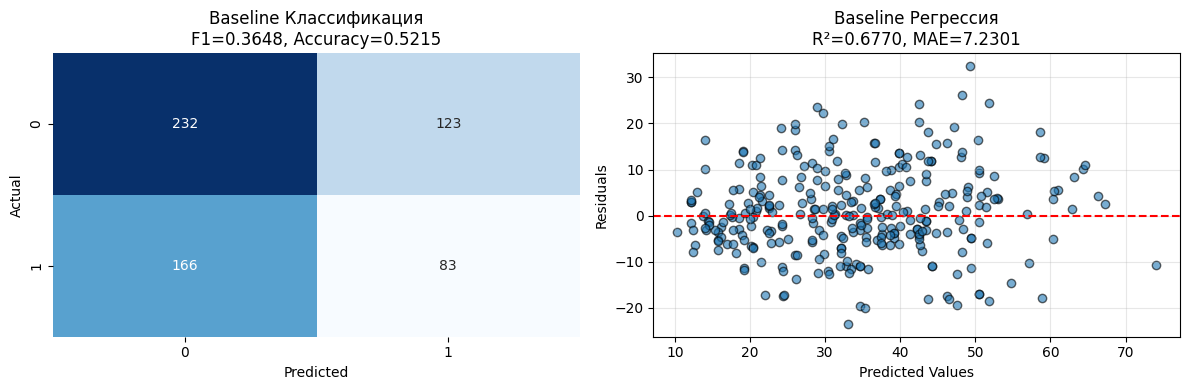

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Матрица ошибок для классификации
cm_baseline_clf = confusion_matrix(y_test_water, y_pred_water_baseline)
sns.heatmap(cm_baseline_clf, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title(f'Baseline Классификация\nF1={f1:.4f}, Accuracy={accuracy:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# График остатков для регрессии
residuals_baseline_reg = y_test_concrete - y_pred_concrete_baseline
axes[1].scatter(y_pred_concrete_baseline, residuals_baseline_reg, alpha=0.6, edgecolors='k')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'Baseline Регрессия\nR²={r2:.4f}, MAE={mae:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Видим по матрице ошибок, что модель классификации ошибается. Модели регрессии не хватает кучности.

## 3. Улучшение бейзлайна

### 3.a Формулирование гипотез улучшения

**Гипотеза 1:** Замена пропуском на медиану или среднее

**Гипотеза 2:** Стандартизация признаков улучшит качество KNN (алгоритм чувствителен к масштабу)

**Гипотеза 3:** Подбор оптимального параметра k на кросс-валидации даст лучшие результаты, чем k=5

**Гипотеза 4:** Удаление выбросов методом IQR улучшит качество модели, особенно для регрессии

### 3b. Проверка гипотез

Проверим гипотезу 1

In [19]:
# читаем данные снова для классификации
df_water_new = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# заменяем пропуски на медиану по классам
df_water_new['ph'] = df_water_new.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_new['Sulfate'] = df_water_new.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_new['Trihalomethanes'] = df_water_new.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))
X_water = df_water_new.drop('Potability', axis=1)
y_water = df_water_new['Potability']

# читаем данные снова для регрессии
df_concrete_new = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# заменяем пропуски на среднее значение
df_concrete_new = df_concrete_new.fillna(df_concrete_new.mean(numeric_only=True))
X_concrete = df_concrete_new.iloc[:, :-1]
y_concrete = df_concrete_new.iloc[:, -1]

# Разделение на обучающую и тестовую выборки (без обработки пропусков пока)
X_train_water, X_test_water, y_train_water, y_test_water = train_test_split(
    X_water, y_water, test_size=0.2, random_state=42
)

X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(
    X_concrete, y_concrete, test_size=0.2, random_state=42
)

Поссотрим на дисбаланс классов

            count  percent
Potability                
0            1998    60.99
1            1278    39.01


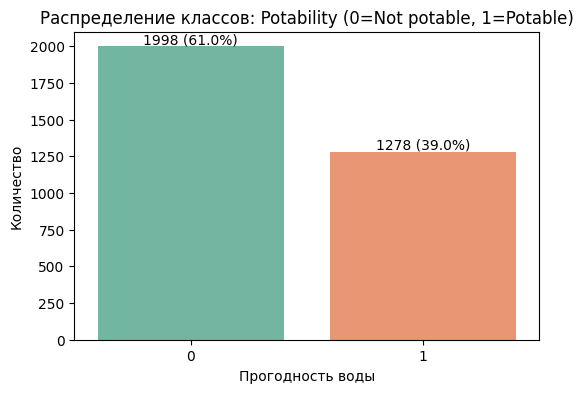

In [20]:
class_counts = df_water_new['Potability'].value_counts()
class_perc = df_water_new['Potability'].value_counts(normalize=True) * 100
print(pd.DataFrame({'count': class_counts, 'percent': class_perc.round(2)}))
plt.figure(figsize=(6,4))
sns.countplot(x='Potability', data=df_water_new, palette='Set2')
plt.title('Распределение классов: Potability (0=Not potable, 1=Potable)')
plt.xlabel('Прогодность воды')
plt.ylabel('Количество')

# Подписываем количества и проценты над барами
for i, v in enumerate(class_counts):
    plt.text(i, v + max(class_counts)*0.01, f'{v} ({class_perc.iloc[i]:.1f}%)', ha='center')
plt.show()

Как видим, дисбаланс так и присутсвует

Для регрессии будет полезно рассмотреть распределение основной величины

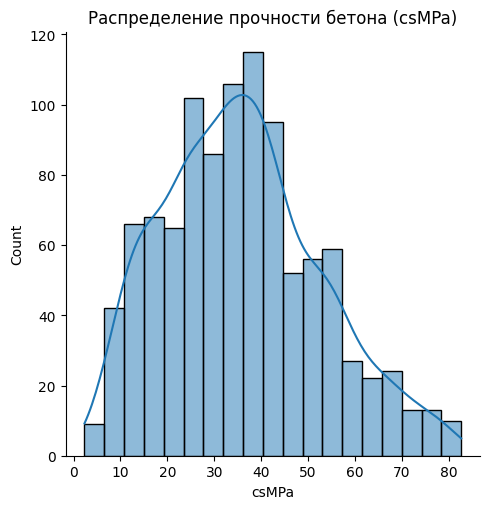

In [21]:
sns.displot(df_concrete_new['csMPa'], kde=True)
plt.title('Распределение прочности бетона (csMPa)')
plt.show()

Сильно выбивающихся значений нет, можно будет попробовать изменить распределение основной величины

In [22]:
# Обучение модели классификации KNN
knn_clf_baseline = KNeighborsClassifier(n_neighbors=5)
knn_clf_baseline.fit(X_train_water, y_train_water)
y_pred_water_baseline = knn_clf_baseline.predict(X_test_water)
y_pred_proba_water_baseline = knn_clf_baseline.predict_proba(X_test_water)[:, 1]

# Обучение модели регрессии KNN
knn_reg_baseline = KNeighborsRegressor(n_neighbors=5)
knn_reg_baseline.fit(X_train_concrete, y_train_concrete)
y_pred_concrete_baseline = knn_reg_baseline.predict(X_test_concrete)


Метрики качества (KNN, k=5):
  Accuracy:  0.5915
  Precision: 0.4348
  Recall:    0.3279
  F1-score:  0.3738
  ROC-AUC:   0.5377
  PR-AUC: 0.4219

Матрица ошибок:

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       412
           1       0.43      0.33      0.37       244

    accuracy                           0.59       656
   macro avg       0.54      0.54      0.54       656
weighted avg       0.57      0.59      0.58       656



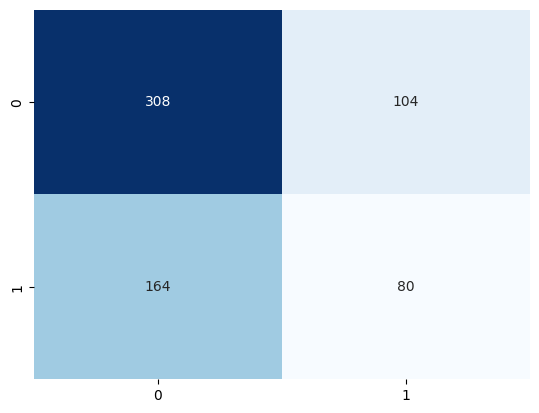

In [47]:
accuracy = accuracy_score(y_test_water, y_pred_water_baseline)
precision = precision_score(y_test_water, y_pred_water_baseline, zero_division=0)
recall = recall_score(y_test_water, y_pred_water_baseline, zero_division=0)
f1 = f1_score(y_test_water, y_pred_water_baseline, zero_division=0)
roc_auc = roc_auc_score(y_test_water, y_pred_water_baseline)
pr_curve = precision_recall_curve(y_test_water, y_pred_proba_water_baseline)
cm = confusion_matrix(y_test_water, y_pred_water_baseline)

pr_auc = auc(pr_curve[1], pr_curve[0])

print(f"\nМетрики качества (KNN, k=5):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC: {pr_auc:.4f}")

print(f"\nМатрица ошибок:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

print(f"\nОтчет о классификации:")
print(classification_report(y_test_water, y_pred_water_baseline))

Значения метрик улучшились, но незначительно. Accuracy и F1 увеличились на 0.03

Посморим на метрики для регрессии

In [24]:
mse = mean_squared_error(y_test_concrete, y_pred_concrete_baseline)
mae = mean_absolute_error(y_test_concrete, y_pred_concrete_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_concrete, y_pred_concrete_baseline)

print(f"\nМетрики качества (KNN, k=5):")
print(f"  MSE:  {mse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


Метрики качества (KNN, k=5):
  MSE:  68.7935
  MAE:  6.4810
  RMSE: 8.2942
  R²:   0.7330


На значения метрик регрессии гипотиза 1 не повлияла

Проверим гипотезу 2

БЕЗ стандартизации: Accuracy=0.5915, F1=0.3738, ROC-AUC=0.5377, PR-AUC=0.4219
СО стандартизацией:  Accuracy=0.6921, F1=0.5167, ROC-AUC=0.6412, PR-AUC=0.6353


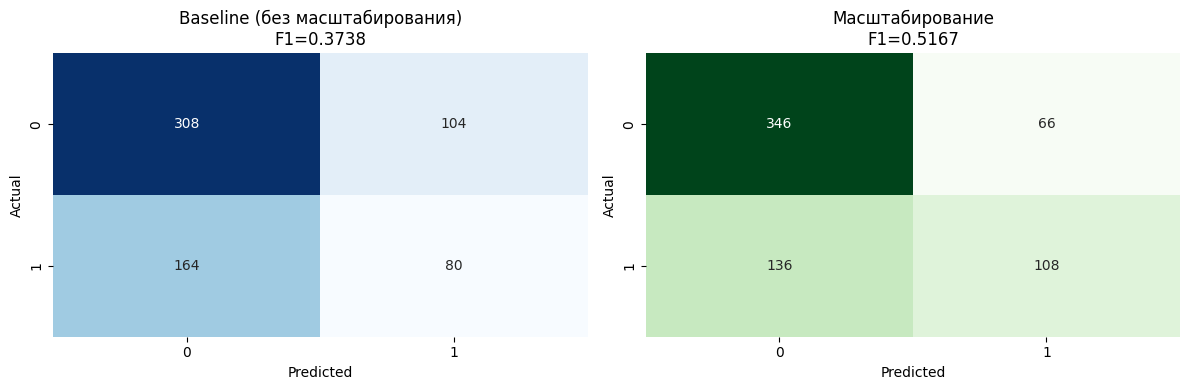

In [48]:

# from imblearn.over_sampling import SMOTE

print(f"БЕЗ стандартизации: Accuracy={accuracy:.4f}, F1={f1:.4f}, ROC-AUC={roc_auc:.4f}, PR-AUC={pr_auc:.4f}")

scaler_water_hyp1 = RobustScaler() # такое масштабирование лучше работает с выбросами
X_train_water_hyp1 = scaler_water_hyp1.fit_transform(X_train_water)
X_test_water_hyp1 = scaler_water_hyp1.transform(X_test_water)


# smote = SMOTE(random_state=42)
# X_train_water_hyp1_bal, y_train_water_hyp1_bal = smote.fit_resample(X_train_water_hyp1, y_train_water)


knn_clf_hyp1 = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
knn_clf_hyp1.fit(X_train_water_hyp1, y_train_water)
y_pred_clf_hyp1 = knn_clf_hyp1.predict(X_test_water_hyp1)
# y_pred_proba_clf_hyp1 = knn_clf_hyp1.predict_proba(X_test_water_hyp1)[:, 1]

acc_hyp1 = accuracy_score(y_test_water, y_pred_clf_hyp1)
f1_hyp1 = f1_score(y_test_water, y_pred_clf_hyp1, zero_division=0)
roc_auc_hyp1 = roc_auc_score(y_test_water, y_pred_clf_hyp1)
pr_curve_hyp1 = precision_recall_curve(y_test_water, y_pred_clf_hyp1)
pr_auc_hyp1 = auc(pr_curve_hyp1[1], pr_curve_hyp1[0])

print(f"СО стандартизацией:  Accuracy={acc_hyp1:.4f}, F1={f1_hyp1:.4f}, ROC-AUC={roc_auc_hyp1:.4f}, PR-AUC={pr_auc_hyp1:.4f}")

# Визуализация результатов классификации
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Матрица ошибок для baseline
cm_baseline = confusion_matrix(y_test_water, y_pred_water_baseline)
sns.heatmap(cm_baseline, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title(f'Baseline (без масштабирования)\nF1={f1:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Матрица ошибок для гипотезы 1
cm_hyp1 = confusion_matrix(y_test_water, y_pred_clf_hyp1)
sns.heatmap(cm_hyp1, annot=True, fmt='d', ax=axes[1], cmap='Greens', cbar=False)
axes[1].set_title(f'Масштабирование\nF1={f1_hyp1:.4f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Применение нормализации (стандартизации) значительно улучшило показатели. Модель перестала угадывать --- Accuracy=0.69, F1=0.52

Проверим применение масштабирования на регрессии

БЕЗ стандартизации: MAE=6.4810, R²=0.7330, MSE=68.7935
СО стандартизацией:  MAE=5.9453, R²=0.7805, MSE=56.5564


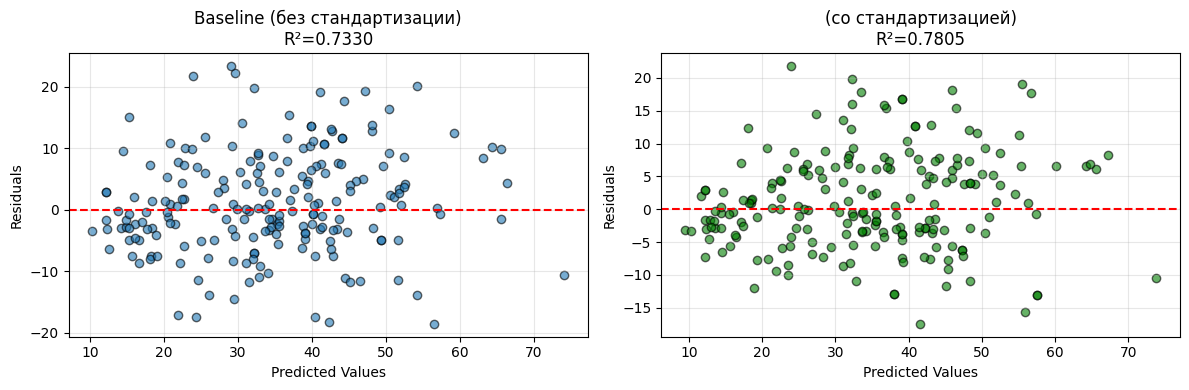

In [49]:
print(f"БЕЗ стандартизации: MAE={mae:.4f}, R²={r2:.4f}, MSE={mse:.4f}")
# Со стандартизацией
scaler_concrete_hyp1 = RobustScaler()
X_train_concrete_hyp1 = scaler_concrete_hyp1.fit_transform(X_train_concrete)
X_test_concrete_hyp1 = scaler_concrete_hyp1.transform(X_test_concrete)

knn_reg_hyp1 = KNeighborsRegressor(n_neighbors=5)
knn_reg_hyp1.fit(X_train_concrete_hyp1, y_train_concrete)
y_pred_reg_hyp1 = knn_reg_hyp1.predict(X_test_concrete_hyp1)

mae_hyp1 = mean_absolute_error(y_test_concrete, y_pred_reg_hyp1)
mse_hyp1 = mean_squared_error(y_test_concrete, y_pred_reg_hyp1)
r2_hyp1 = r2_score(y_test_concrete, y_pred_reg_hyp1)

print(f"СО стандартизацией:  MAE={mae_hyp1:.4f}, R²={r2_hyp1:.4f}, MSE={mse_hyp1:.4f}")

# Визуализация результатов регрессии
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# График остатков для baseline
residuals_baseline = y_test_concrete - y_pred_concrete_baseline
axes[0].scatter(y_pred_concrete_baseline, residuals_baseline, alpha=0.6, edgecolors='k')
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title(f'Baseline (без стандартизации)\nR²={r2:.4f}')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].grid(alpha=0.3)

# График остатков для гипотезы 1
residuals_hyp1 = y_test_concrete - y_pred_reg_hyp1
axes[1].scatter(y_pred_reg_hyp1, residuals_hyp1, alpha=0.6, edgecolors='k', color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'(со стандартизацией)\nR²={r2_hyp1:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

На графике видно, точки стали кучнее, абсолютная и средне квадратическая ошибка уменьшились, разброс уменьшился

Проверим гипотезу 2

Поиск оптимального k: k=1, CV F1-score=0.5378
k=5 (гипотеза 2):   Accuracy=0.6921, F1=0.5167, ROC-AUC=0.6412, PR-AUC=0.6353
k=1 (оптимальное): Accuracy=0.6646, F1=0.5378, ROC-AUC=0.6361, PR-AUC=0.6266


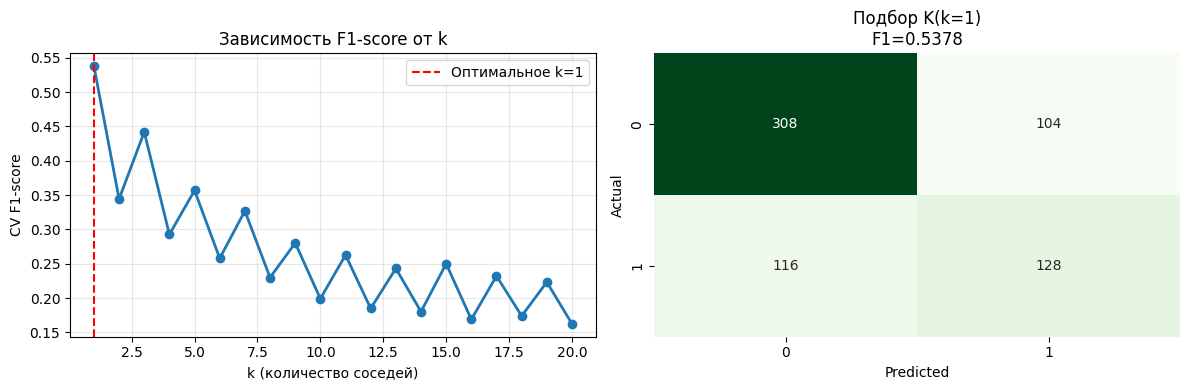

In [50]:
k_values = range(1, 21)
cv_scores_clf_hyp2 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, leaf_size=20)
    scores = cross_val_score(knn, X_train_water, y_train_water, cv=5, scoring='f1')
    cv_scores_clf_hyp2.append(scores.mean())

best_k_hyp2_clf = k_values[np.argmax(cv_scores_clf_hyp2)]
best_cv_score_hyp2_clf = max(cv_scores_clf_hyp2)

print(f"Поиск оптимального k: k={best_k_hyp2_clf}, CV F1-score={best_cv_score_hyp2_clf:.4f}")

knn_clf_hyp2_best = KNeighborsClassifier(n_neighbors=best_k_hyp2_clf, leaf_size=20)
knn_clf_hyp2_best.fit(X_train_water_hyp1, y_train_water)
y_pred_clf_hyp2_best = knn_clf_hyp2_best.predict(X_test_water_hyp1)

f1_hyp2_best = f1_score(y_test_water, y_pred_clf_hyp2_best, zero_division=0)
acc_hyp2_best = accuracy_score(y_test_water, y_pred_clf_hyp2_best)
roc_auc_hyp2_best = roc_auc_score(y_test_water, y_pred_clf_hyp2_best)
pr_curve_hyp2_best = precision_recall_curve(y_test_water, y_pred_clf_hyp2_best)
pr_auc_hyp2_best = auc(pr_curve_hyp2_best[1], pr_curve_hyp2_best[0])

print(f"k=5 (гипотеза 2):   Accuracy={acc_hyp1:.4f}, F1={f1_hyp1:.4f}, ROC-AUC={roc_auc_hyp1:.4f}, PR-AUC={pr_auc_hyp1:.4f}")
print(f"k={best_k_hyp2_clf} (оптимальное): Accuracy={acc_hyp2_best:.4f}, F1={f1_hyp2_best:.4f}, ROC-AUC={roc_auc_hyp2_best:.4f}, PR-AUC={pr_auc_hyp2_best:.4f}")

# График зависимости F1 от k и матрица ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(k_values, cv_scores_clf_hyp2, marker='o', linewidth=2, markersize=6)
axes[0].axvline(x=best_k_hyp2_clf, color='r', linestyle='--', label=f'Оптимальное k={best_k_hyp2_clf}')
axes[0].set_xlabel('k (количество соседей)')
axes[0].set_ylabel('CV F1-score')
axes[0].set_title('Зависимость F1-score от k')
axes[0].legend()
axes[0].grid(alpha=0.3)

cm_hyp2 = confusion_matrix(y_test_water, y_pred_clf_hyp2_best)
sns.heatmap(cm_hyp2, annot=True, fmt='d', ax=axes[1], cmap='Greens', cbar=False)
axes[1].set_title(f'Подбор K(k={best_k_hyp2_clf})\nF1={f1_hyp2_best:.4f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Точность модели снизилась на 3 сотые. Значение метрики F1 увеличилось на 2 сотые.

Поиск оптимального k: k=4, CV R²-score=0.7727
k=5 (baseline):    MAE=6.4810, R²=0.7330, MSE=68.7935
k=5 (гипотеза 2):    MAE=5.9453, R²=0.7805, MSE=56.5564
k=4 (оптимальное): MAE=5.8359, R²=0.7883, MSE=54.5502


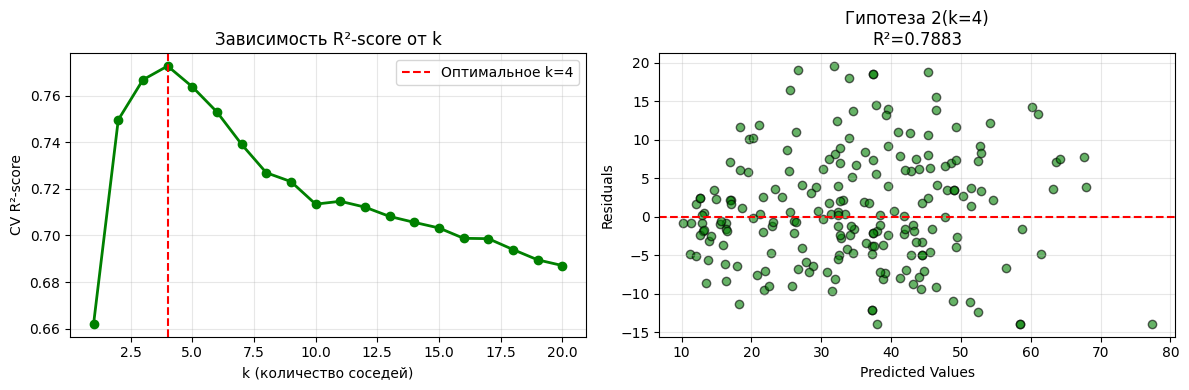

In [53]:
cv_scores_reg_hyp2 = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_concrete_hyp1, y_train_concrete, cv=5, scoring='r2')
    cv_scores_reg_hyp2.append(scores.mean())

best_k_hyp2_reg = k_values[np.argmax(cv_scores_reg_hyp2)]
best_cv_score_hyp2_reg = max(cv_scores_reg_hyp2)

print(f"Поиск оптимального k: k={best_k_hyp2_reg}, CV R²-score={best_cv_score_hyp2_reg:.4f}")

knn_reg_hyp2_best = KNeighborsRegressor(n_neighbors=best_k_hyp2_reg)
knn_reg_hyp2_best.fit(X_train_concrete_hyp1, y_train_concrete)
y_pred_reg_hyp2_best = knn_reg_hyp2_best.predict(X_test_concrete_hyp1)

r2_hyp2_best = r2_score(y_test_concrete, y_pred_reg_hyp2_best)
mae_hyp2_best = mean_absolute_error(y_test_concrete, y_pred_reg_hyp2_best)
mse_hyp2_best = mean_squared_error(y_test_concrete, y_pred_reg_hyp2_best)

print(f"k=5 (baseline):    MAE={mae:.4f}, R²={r2:.4f}, MSE={mse:.4f}")
print(f"k=5 (гипотеза 2):    MAE={mae_hyp1:.4f}, R²={r2_hyp1:.4f}, MSE={mse_hyp1:.4f}")
print(f"k={best_k_hyp2_reg} (оптимальное): MAE={mae_hyp2_best:.4f}, R²={r2_hyp2_best:.4f}, MSE={mse_hyp2_best:.4f}")


# График зависимости R² от k и остатки
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(k_values, cv_scores_reg_hyp2, marker='o', linewidth=2, markersize=6, color='green')
axes[0].axvline(x=best_k_hyp2_reg, color='r', linestyle='--', label=f'Оптимальное k={best_k_hyp2_reg}')
axes[0].set_xlabel('k (количество соседей)')
axes[0].set_ylabel('CV R²-score')
axes[0].set_title('Зависимость R²-score от k')
axes[0].legend()
axes[0].grid(alpha=0.3)

residuals_hyp2 = y_test_concrete - y_pred_reg_hyp2_best
axes[1].scatter(y_pred_reg_hyp2_best, residuals_hyp2, alpha=0.6, edgecolors='k', color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'Гипотеза 2(k={best_k_hyp2_reg})\nR²={r2_hyp2_best:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Все ошибки уменьшились, особенно MSE на 7 целых

Проверим гипотезу 3

Фнукиця для удаления выбросов

In [29]:
def remove_outliers_iqr(X: pd.DataFrame, y: pd.Series = None, factor: float = 1.5):
    """Удаляет строки, где хоть в одном числовом признаке значение выходит за пределы [Q1 - factor*IQR, Q3 + factor*IQR]."""
    numeric = X.select_dtypes(include=[np.number])
    Q1 = numeric.quantile(0.25)
    Q3 = numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    mask = ((numeric >= lower) & (numeric <= upper)).all(axis=1)
    X_clean = X.loc[mask].copy()
    if y is None:
        return X_clean, mask
    return X_clean, y.loc[mask].copy(), mask

Проверим, как повлияет удаление выбросов на качество модели

Классификация — до/после удаления выбросов (train): (2620, 10) -> (2123, 10)
Распределение классов до:
 Potability
0    0.605344
1    0.394656
Name: proportion, dtype: float64
Распределение классов после:
 Potability
0    0.621291
1    0.378709
Name: proportion, dtype: float64

Классификация — метрики после удаления выбросов:
  Accuracy:  0.6479  (предыдущее: 0.6921)
  F1-score:  0.5237  (предыдущее: 0.5167)
  ROC-AUC:   0.6219  (предыдущее: 0.6412)
  PR-AUC:    0.6129  (предыдущее: 0.6353)


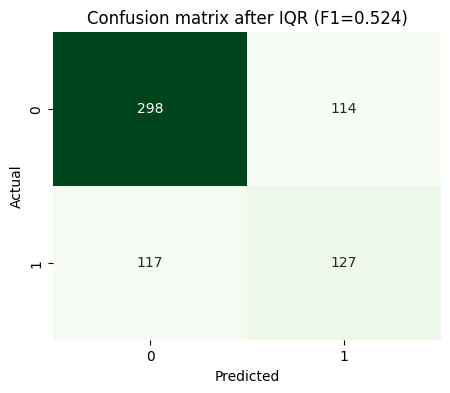

In [54]:
X_tr_w, y_tr_w = X_train_water, y_train_water  # исходные тренировочные до удаления выбросов
X_tr_w_clean, y_tr_w_clean, mask_w = remove_outliers_iqr(X_tr_w, y_tr_w, factor=1.5)

print("Классификация — до/после удаления выбросов (train):", X_tr_w.shape, "->", X_tr_w_clean.shape)
print("Распределение классов до:\n", y_tr_w.value_counts(normalize=True))
print("Распределение классов после:\n", y_tr_w_clean.value_counts(normalize=True))

# Масштабирование и обучение на очищенных данных
scaler_w_hyp3 = RobustScaler()
X_tr_w_clean_scaled = scaler_w_hyp3.fit_transform(X_tr_w_clean)
X_test_w_scaled_for_clean = scaler_w_hyp3.transform(X_test_water)  # масштабируем тест по обученному на очищенных

knn_clf_hyp3 = KNeighborsClassifier(n_neighbors=best_k_hyp2_clf, leaf_size=20)
knn_clf_hyp3.fit(X_tr_w_clean_scaled, y_tr_w_clean)
y_pred_hyp3 = knn_clf_hyp3.predict(X_test_w_scaled_for_clean)
y_pred_proba_hyp3 = knn_clf_hyp3.predict_proba(X_test_w_scaled_for_clean)[:, 1]

acc_hyp3 = accuracy_score(y_test_water, y_pred_hyp3)
f1_hyp3 = f1_score(y_test_water, y_pred_hyp3, zero_division=0)
roc_hyp3 = roc_auc_score(y_test_water, y_pred_hyp3)
pr_curve_hyp3 = precision_recall_curve(y_test_water, y_pred_proba_hyp3)
pr_auc_hyp3 = auc(pr_curve_hyp3[1], pr_curve_hyp3[0])

print("\nКлассификация — метрики после удаления выбросов:")
print(f"  Accuracy:  {acc_hyp3:.4f}  (предыдущее: {acc_hyp1:.4f})")
print(f"  F1-score:  {f1_hyp3:.4f}  (предыдущее: {f1_hyp1:.4f})")
print(f"  ROC-AUC:   {roc_hyp3:.4f}  (предыдущее: {roc_auc_hyp1:.4f})")
print(f"  PR-AUC:    {pr_auc_hyp3:.4f}  (предыдущее: {pr_auc_hyp1:.4f})")

# Визуализация матрицы ошибок
cm_hyp3 = confusion_matrix(y_test_water, y_pred_hyp3)
plt.figure(figsize=(5,4))
sns.heatmap(cm_hyp3, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f'Confusion matrix after IQR (F1={f1_hyp3:.3f})')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

Удаление выбросов не улучшило качество модели классификации. Возможная причина: использование RobustScaler для масштабирования, это решение менее чувствительно к выбросам.

Проверим, как повляет удаление выбросов на качество модели регрессии


Регрессия — до/после удаления выбросов (train): (824, 8) -> (759, 8)
Примеры целевой переменной до (describe):
 count    824.00
mean      35.86
std       16.87
min        2.33
25%       23.68
50%       34.08
75%       45.86
max       82.60
Name: csMPa, dtype: float64
Примеры целевой переменной после (describe):
 count    759.00
mean      35.20
std       17.01
min        2.33
25%       22.87
50%       33.42
75%       44.86
max       82.60
Name: csMPa, dtype: float64

Регрессия — метрики после удаления выбросов:
  MAE:  5.3739  (предыдущее: 5.9453)
  R²:   0.8046  (предыдущее: 0.7805)


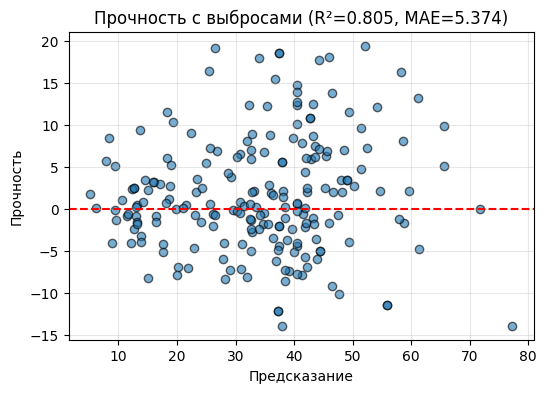

In [55]:
X_tr_c, y_tr_c = X_train_concrete, y_train_concrete
X_tr_c_clean, y_tr_c_clean, mask_c = remove_outliers_iqr(X_tr_c, y_tr_c, factor=1.5)

print("\nРегрессия — до/после удаления выбросов (train):", X_tr_c.shape, "->", X_tr_c_clean.shape)
print("Примеры целевой переменной до (describe):\n", y_tr_c.describe().round(2))
print("Примеры целевой переменной после (describe):\n", y_tr_c_clean.describe().round(2))

# Масштабирование и обучение на очищенных данных
scaler_c_hyp3 = RobustScaler()
X_tr_c_clean_scaled = scaler_c_hyp3.fit_transform(X_tr_c_clean)
X_test_c_scaled_for_clean = scaler_c_hyp3.transform(X_test_concrete)

knn_reg_hyp3 = KNeighborsRegressor(n_neighbors=best_k_hyp2_reg)
knn_reg_hyp3.fit(X_tr_c_clean_scaled, y_tr_c_clean)
y_pred_reg_hyp3 = knn_reg_hyp3.predict(X_test_c_scaled_for_clean)

# Метрики регрессии
mse_hyp3 = mean_squared_error(y_test_concrete, y_pred_reg_hyp3)
mae_hyp3 = mean_absolute_error(y_test_concrete, y_pred_reg_hyp3)
rmse_hyp3 = np.sqrt(mse_hyp3)
r2_hyp3 = r2_score(y_test_concrete, y_pred_reg_hyp3)

print("\nРегрессия — метрики после удаления выбросов:")
print(f"  MAE:  {mae_hyp3:.4f}  (предыдущее: {mae_hyp1:.4f})")
# print(f"  RMSE: {rmse_hyp3:.4f}  (предыдущее: {rmse_hyp1:.4f})")
print(f"  R²:   {r2_hyp3:.4f}  (предыдущее: {r2_hyp1:.4f})")

plt.figure(figsize=(6,4))
resid = y_test_concrete - y_pred_reg_hyp3
plt.scatter(y_pred_reg_hyp3, resid, alpha=0.6, edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Предсказание'); plt.ylabel('Прочность')
plt.title(f'Прочность с выбросами (R²={r2_hyp3:.3f}, MAE={mae_hyp3:.3f})')
plt.grid(alpha=0.3)
plt.show()

Абсолютная ошибка уменьшилась, но разброс стал больше. Удаление выбросов не улучшает качество модели

### 3 c-f. Формирование улучшеного бейзлайна

При проверке гипотез выяснили, что для улучшения качества моделей можно использовать масштабирование с подборкой гиперпараметра k и заменять пропуски на медиану или среднее.

При проверке гипотез уже обучили модели, вывидем новые и старые показатели

Модели обучены с использованием: масштабирования, подбора гиперпараметра k и заменой пропусков.

In [56]:
print("Метрики классификации:")
print(f"baseline k=5: Accuracy={accuracy:.4f}, F1={f1:.4f}, ROC-AUC={roc_auc:.4f}, PR-AUC={pr_auc:.4f}")
print(f"k={best_k_hyp2_clf} (оптимальное): Accuracy={acc_hyp2_best:.4f}, F1={f1_hyp2_best:.4f}, ROC-AUC={roc_auc_hyp2_best:.4f}, PR-AUC={pr_auc_hyp2_best:.4f}")

print("\nМетрики регрессии:")
print(f"k=5 (baseline):    MAE={mae:.4f}, R²={r2:.4f}, MSE={mse:.4f}")
print(f"k={best_k_hyp2_reg} (оптимальное): MAE={mae_hyp2_best:.4f}, R²={r2_hyp2_best:.4f}, MSE={mse_hyp2_best:.4f}")

Метрики классификации:
baseline k=5: Accuracy=0.5915, F1=0.3738, ROC-AUC=0.5377, PR-AUC=0.4219
k=1 (оптимальное): Accuracy=0.6646, F1=0.5378, ROC-AUC=0.6361, PR-AUC=0.6266

Метрики регрессии:
k=5 (baseline):    MAE=6.4810, R²=0.7330, MSE=68.7935
k=4 (оптимальное): MAE=5.8359, R²=0.7883, MSE=54.5502


### 3g. Выводы

Проанализировав различные гипотезы для улучшения качества моделей, можем заключить следующее: удаление выбросов и пропусков не всегда дает хорошие результаты, особенно, если есть дисбаланс классов и размер датасета небольшой.

Лучшим решением для улучшения показателей алгоритма KNN является подбор гиперпараметра k, замена пропусков на среднее или медиану и использовние масштабирования. Масштабирование дает наибольшее улучшение метрик по сравнинию с отстальными способами.

Также стоит отметить, что обучение на сырых данных никогда не дает хороших результатов. Необходимо всегда сначала делать препроцессинг датасета, чтобы модели не "отвлекались" на выбросы, пропуски, корреляции и тд.

## 4. Имплементация алгоритма KNN для классификации и регрессии

### 4a. Реализация алгоритмов

Реализуем алгоритм KNN для классификации

In [33]:
class KNNClassifier:
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def _distance(self, x1, x2):
        """Расчет расстояния между двумя точками"""
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unknown metric: {self.metric}")
    
    def _predict_single(self, x):
        """Предсказание класса для одной точки"""
        distances = np.array([self._distance(x, x_train) for x_train in self.X_train])
        
        # Индексы k ближайших соседей
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_labels = self.y_train[k_indices]
        
        # Возвращаем самый частый класс
        unique, counts = np.unique(k_labels, return_counts=True)
        return unique[np.argmax(counts)]
    
    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_single(x) for x in X])
    
    def predict_proba(self, X):
        X = np.array(X)
        probas = []
        
        for x in X:
            distances = np.array([self._distance(x, x_train) for x_train in self.X_train])
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_labels = self.y_train[k_indices]
            
            unique_classes = np.unique(self.y_train)
            class_counts = np.array([np.sum(k_labels == c) for c in unique_classes])
            proba = class_counts / self.n_neighbors
            probas.append(proba)
        
        return np.array(probas)

In [34]:
class KNNRegressor:
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def _distance(self, x1, x2):
        """Расчет расстояния между двумя точками"""
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unknown metric: {self.metric}")
    
    def _predict_single(self, x):
        """Предсказание значения для одной точки"""
        distances = np.array([self._distance(x, x_train) for x_train in self.X_train])
        
        # Индексы k ближайших соседей
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_values = self.y_train[k_indices]
        
        # Возвращаем среднее значение k ближайших соседей
        return np.mean(k_values)
    
    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_single(x) for x in X])

### 4b. Обучение собственной реализации KNN

Для начала разобьем данные на обучающую и тестовую выборки для классификации

In [35]:
df_water_test = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# удавление пропусков для классификации
df_water_test = df_water_test.dropna()
X_water_test = df_water_test.drop('Potability', axis=1)
y_water_test = df_water_test['Potability']

# Разделение на обучающую и тестовую выборки (без обработки пропусков пока)
X_train_water_cu, X_test_water_cu, y_train_water_cu, y_test_water_cu = train_test_split(
    X_water_test, y_water_test, test_size=0.3, random_state=42
)

print(f"Water Potability - данные: X={X_water_test.shape}, y={y_water_test.shape}")
print(f"\nТренировочная выборка: {X_train_water_cu.shape}")
print(f"Тестовая выборка: {X_test_water_cu.shape}")

Water Potability - данные: X=(2011, 10), y=(2011,)

Тренировочная выборка: (1407, 10)
Тестовая выборка: (604, 10)


Разобьем данные на обучающую и тестовые выборки для регрессии

In [58]:
df_concrete_test = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# удалние пропусков для регрессии
df_concrete_test = df_concrete_test.dropna()
X_concrete_test = df_concrete_test.iloc[:, :-1]
y_concrete_test = df_concrete_test.iloc[:, -1]

# Разделение на обучающую и тестовую выборки (без обработки пропусков пока)
X_train_concrete_cu, X_test_concrete_cu, y_train_concrete_cu, y_test_concrete_cu = train_test_split(
    X_concrete_test, y_concrete_test, test_size=0.3, random_state=42
)

print(f"Concrete Strength - данные: X={X_concrete_test.shape}, y={y_concrete_test.shape}")
print(f"\nТренировочная выборка: {X_train_concrete_cu.shape}")
print(f"Тестовая выборка: {X_test_concrete_cu.shape}")

Concrete Strength - данные: X=(1030, 8), y=(1030,)

Тренировочная выборка: (721, 8)
Тестовая выборка: (309, 8)


Обучим модель классификации

In [59]:
knn_custom_test_clf = KNNClassifier(n_neighbors=5, metric='euclidean')
knn_custom_test_clf.fit(X_train_water_cu, y_train_water_cu)
y_pred_water_custom = knn_custom_test_clf.predict(X_test_water_cu)
y_pred_proba_water_custom = knn_custom_test_clf.predict_proba(X_test_water_cu)[:, 1]

Обучим модель регрессии

In [40]:
knn_custom_test_reg = KNNRegressor(n_neighbors=5, metric='euclidean')
knn_custom_test_reg.fit(X_train_concrete_cu, y_train_concrete_cu)
y_pred_concrete_custom = knn_custom_test_reg.predict(X_test_concrete_cu)

### 4c. Оценка качества реализации

Вычислим основные метрики для классификации

In [60]:
accuracy_custom = accuracy_score(y_test_water_cu, y_pred_water_custom)
precision_custom = f1_score(y_test_water_cu, y_pred_water_custom, zero_division=0)
roc_auc_custom = roc_auc_score(y_test_water_cu, y_pred_proba_water_custom)
pr_curve_custom = precision_recall_curve(y_test_water_cu, y_pred_proba_water_custom)
pr_auc_custom = auc(pr_curve_custom[1], pr_curve_custom[0])

print(f"Собственная реализация KNN (k=5):")
print(f"  Accuracy:  {accuracy_custom:.4f}")
print(f"  F1-score:  {precision_custom:.4f}")
print(f"  ROC-AUC:   {roc_auc_custom:.4f}")
print(f"  PR-AUC:    {pr_auc_custom:.4f}")

Собственная реализация KNN (k=5):
  Accuracy:  0.5687
  F1-score:  0.3416
  ROC-AUC:   0.5409
  PR-AUC:    0.4038


*Полученные значения почти совпадают с теми, что мы получили при работе с готовой реализацией `sklearn`. Модель также пытается просто угадать значение.*

*Это говорит о том, что собственная имплементация алгоритма выполнена верно.*

Вычислим основные метрики для регресии

In [41]:
mae_custom = mean_absolute_error(y_test_concrete_cu, y_pred_concrete_custom)
r2_custom = r2_score(y_test_concrete_cu, y_pred_concrete_custom)
mse_custom = mean_squared_error(y_test_concrete_cu, y_pred_concrete_custom)

print(f"\nСобственная реализация KNN (k=5):")
print(f"  MAE:  {mae_custom:.4f}")
print(f"  R²:   {r2_custom:.4f}")
print(f"  MSE:  {mse_custom:.4f}")


Собственная реализация KNN (k=5):
  MAE:  7.2247
  R²:   0.6773
  MSE:  87.3197


*Полученные значения почти совпадают с теми, что мы получиль при работе с реализацей `sklearn` в разделе 2. Теперь задача -- уменьшить ошибку*

Теперь сделаем препроцессинг данных из части 3 и обучим модель классификации

Water Potability - данные: X=(3276, 10), y=(3276,)

Тренировочная выборка: (2293, 10)
Тестовая выборка: (983, 10)
Собственная реализация KNN (k=1):
  Accuracy:  0.6419
  F1-score:  0.5191
  ROC-AUC:   0.6169
  PR-AUC:    0.6086

Библиотека sklearn KNeighborsClassifier (k=1):
  Accuracy:  0.6419
  F1-score:  0.5191
  ROC-AUC:   0.6169
  PR-AUC:    0.6086


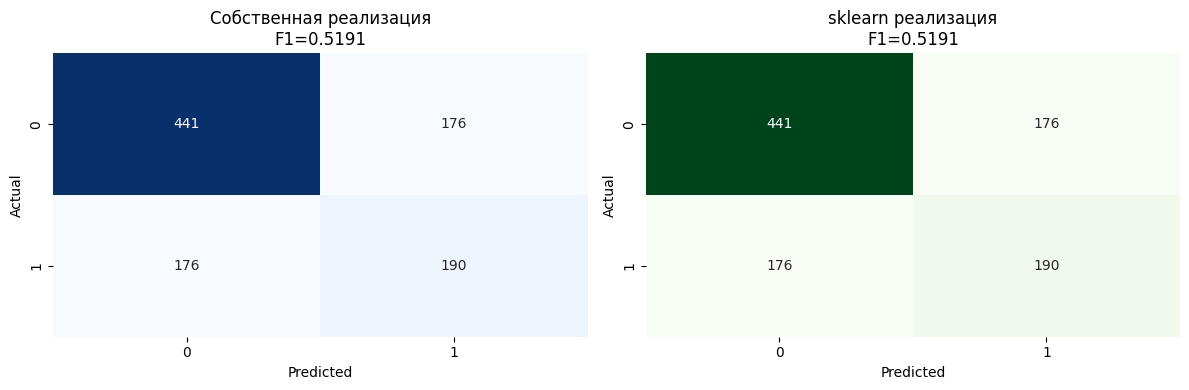

In [61]:
# загрузка исходного датасета классификации
df_water_test = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# замена пропусков на медиану по классам
df_water_test['ph'] = df_water_test.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_test['Sulfate'] = df_water_test.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_test['Trihalomethanes'] = df_water_test.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# деление на признаки и целевую переменную
X_water_test = df_water_test.drop('Potability', axis=1)
y_water_test = df_water_test['Potability']

# разделение на обучающую и тестовую выборки (без обработки пропусков пока)
X_train_water_cu, X_test_water_cu, y_train_water_cu, y_test_water_cu = train_test_split(
    X_water_test, y_water_test, test_size=0.3, random_state=42
)

# вывод информации о данных
print(f"Water Potability - данные: X={X_water_test.shape}, y={y_water_test.shape}")
print(f"\nТренировочная выборка: {X_train_water_cu.shape}")
print(f"Тестовая выборка: {X_test_water_cu.shape}")

# масштабирование данных
scaler_water_hyp1 = RobustScaler()
X_train_water_hyp1 = scaler_water_hyp1.fit_transform(X_train_water_cu)
X_test_water_hyp1 = scaler_water_hyp1.transform(X_test_water_cu)

# обучаем и предсказываем с помощью собственной реализации KNN
knn_custom_clf = KNNClassifier(n_neighbors=best_k_hyp2_clf, metric='euclidean')
knn_custom_clf.fit(X_train_water_hyp1, y_train_water_cu)
y_pred_custom = knn_custom_clf.predict(X_test_water_hyp1)
y_pred_proba_custom = knn_custom_clf.predict_proba(X_test_water_hyp1)

# обучаем и предсказываем с помощью sklearn KNeighborsClassifier
knn_sklearn_clf = KNeighborsClassifier(n_neighbors=best_k_hyp2_clf, leaf_size=20)
knn_sklearn_clf.fit(X_train_water_hyp1, y_train_water_cu)
y_pred_clf_hyp2_best = knn_sklearn_clf.predict(X_test_water_hyp1)
y_pred_proba_clf_hyp2_best = knn_sklearn_clf.predict_proba(X_test_water_hyp1)[:, 1]

# вычисление метрик для обеих реализаций
acc_custom = accuracy_score(y_test_water_cu, y_pred_custom)
f1_custom = f1_score(y_test_water_cu, y_pred_custom, zero_division=0)
roc_custom = roc_auc_score(y_test_water_cu, y_pred_custom)
pr_curve_custom = precision_recall_curve(y_test_water_cu, y_pred_proba_custom[:, 1])
pr_auc_custom = auc(pr_curve_custom[1], pr_curve_custom[0])

acc_sklearn = accuracy_score(y_test_water_cu, y_pred_clf_hyp2_best)
f1_sklearn = f1_score(y_test_water_cu, y_pred_clf_hyp2_best, zero_division=0)
roc_auc_sklearn = roc_auc_score(y_test_water_cu, y_pred_clf_hyp2_best)
pr_curve_sklearn = precision_recall_curve(y_test_water_cu, y_pred_proba_clf_hyp2_best)
pr_auc_sklearn = auc(pr_curve_sklearn[1], pr_curve_sklearn[0])

print(f"Собственная реализация KNN (k={best_k_hyp2_clf}):")
print(f"  Accuracy:  {acc_custom:.4f}")
print(f"  F1-score:  {f1_custom:.4f}")
print(f"  ROC-AUC:   {roc_custom:.4f}")
print(f"  PR-AUC:    {pr_auc_custom:.4f}")

print(f"\nБиблиотека sklearn KNeighborsClassifier (k={best_k_hyp2_clf}):")
print(f"  Accuracy:  {acc_sklearn:.4f}")
print(f"  F1-score:  {f1_sklearn:.4f}")
print(f"  ROC-AUC:   {roc_auc_sklearn:.4f}")
print(f"  PR-AUC:    {pr_auc_sklearn:.4f}")

# визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cm_custom = confusion_matrix(y_test_water_cu, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title(f'Собственная реализация\nF1={f1_custom:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

cm_sklearn = confusion_matrix(y_test_water_cu, y_pred_clf_hyp2_best)
sns.heatmap(cm_sklearn, annot=True, fmt='d', ax=axes[1], cmap='Greens', cbar=False)
axes[1].set_title(f'sklearn реализация\nF1={f1_sklearn:.4f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

*На одинаковых данных и с одинаковыми парметрами и масштабированием получили идентичные значения. Это еще раз подтверждает, что имплементация алгоритма KNN для классификации верна. Стоит заметить, что имплементация работает в разы дольше, чем готовое решение из библиотеки sklearn.*

Сделаем препроцессинг данных как в разделе 3 и обучим модель регрессии

Concrete Strength - данные: X=(1030, 8), y=(1030,)

Тренировочная выборка: (721, 8)
Тестовая выборка: (309, 8)
Собственная реализация KNN Regressor (k=4):
  MAE:  6.2368
  R²:   0.7515
  MSE:  67.2346

Библиотека sklearn KNeighborsRegressor (k=4):
  MAE:  6.2047
  R²:   0.7525
  MSE:  66.9584


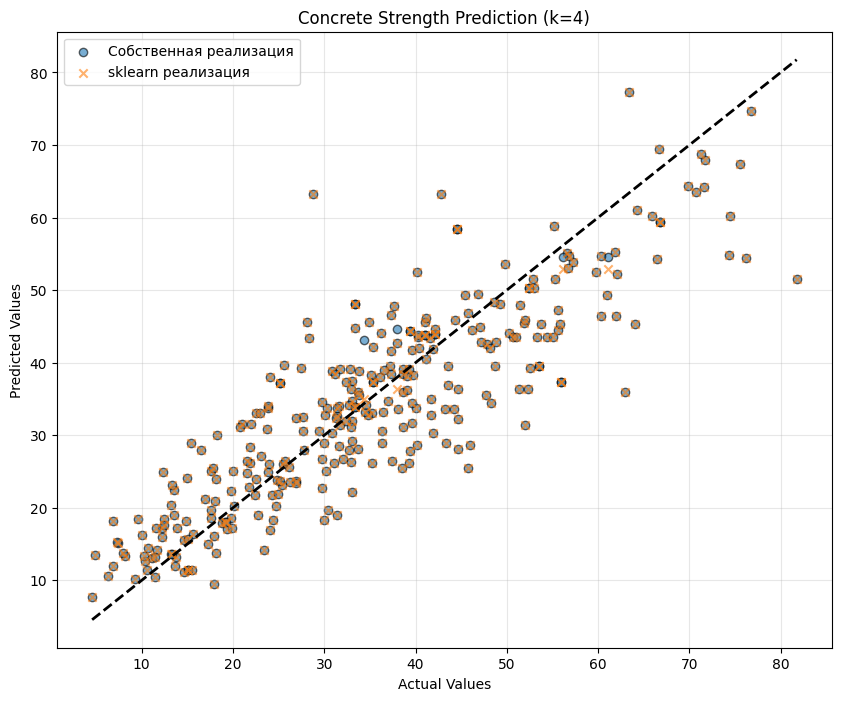

In [44]:
# загружаем заново исходный датасет
df_concrete_test = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# заполняем пропуски медианами по столбцам
df_concrete_test = df_concrete_test.fillna(df_concrete_test.median())

# разделяем на признаки и целевую переменную
X_concrete_test = df_concrete_test.iloc[:, :-1]
y_concrete_test = df_concrete_test.iloc[:, -1]

# делим на обучающую и тестовую выборки
X_train_concrete_cu, X_test_concrete_cu, y_train_concrete_cu, y_test_concrete_cu = train_test_split(
    X_concrete_test, y_concrete_test, test_size=0.3, random_state=42
)

# вывод информации о данных
print(f"Concrete Strength - данные: X={X_concrete_test.shape}, y={y_concrete_test.shape}")
print(f"\nТренировочная выборка: {X_train_concrete_cu.shape}")
print(f"Тестовая выборка: {X_test_concrete_cu.shape}")

# применяем масштабирование
scaler_concrete_hyp1 = RobustScaler()
X_train_concrete_hyp1 = scaler_concrete_hyp1.fit_transform(X_train_concrete_cu)
X_test_concrete_hyp1 = scaler_concrete_hyp1.transform(X_test_concrete_cu)

# обучаем и предсказываем с помощью собственной реализации
knn_custom_reg = KNNRegressor(n_neighbors=best_k_hyp2_reg, metric='euclidean')
knn_custom_reg.fit(X_train_concrete_hyp1, y_train_concrete_cu)
y_pred_custom_reg = knn_custom_reg.predict(X_test_concrete_hyp1)

# обучаем и предсказываем с помощью sklearn
knn_sklearn_reg = KNeighborsRegressor(n_neighbors=best_k_hyp2_reg)
knn_sklearn_reg.fit(X_train_concrete_hyp1, y_train_concrete_cu)
y_pred_sklearn_reg = knn_sklearn_reg.predict(X_test_concrete_hyp1)

# вычисляем метрики для обеих реализаций
mae_custom_reg = mean_absolute_error(y_test_concrete_cu, y_pred_custom_reg)
r2_custom_reg = r2_score(y_test_concrete_cu, y_pred_custom_reg)
mse_custom_reg = mean_squared_error(y_test_concrete_cu, y_pred_custom_reg)

mae_sklearn_reg = mean_absolute_error(y_test_concrete_cu, y_pred_sklearn_reg)
r2_sklearn_reg = r2_score(y_test_concrete_cu, y_pred_sklearn_reg)
mse_sklearn_reg = mean_squared_error(y_test_concrete_cu, y_pred_sklearn_reg)

print(f"Собственная реализация KNN Regressor (k={best_k_hyp2_reg}):")
print(f"  MAE:  {mae_custom_reg:.4f}")
print(f"  R²:   {r2_custom_reg:.4f}")
print(f"  MSE:  {mse_custom_reg:.4f}")

print(f"\nБиблиотека sklearn KNeighborsRegressor (k={best_k_hyp2_reg}):")
print(f"  MAE:  {mae_sklearn_reg:.4f}")
print(f"  R²:   {r2_sklearn_reg:.4f}")
print(f"  MSE:  {mse_sklearn_reg:.4f}")

# сравниваем модели на графике
plt.figure(figsize=(10,8))
plt.scatter(y_test_concrete_cu, y_pred_custom_reg, alpha=0.6, edgecolors='k', label='Собственная реализация')
plt.scatter(y_test_concrete_cu, y_pred_sklearn_reg, alpha=0.6, edgecolors='r', label='sklearn реализация', marker='x')
plt.plot([y_test_concrete_cu.min(), y_test_concrete_cu.max()], [y_test_concrete_cu.min(), y_test_concrete_cu.max()], 'k--', lw=2)
plt.xlabel('Actual Values'); plt.ylabel('Predicted Values')
plt.title(f'Concrete Strength Prediction (k={best_k_hyp2_reg})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

*Можем заметить, что результат имплементации отличается от готового решения библиотеки `sklearn`. Это видно как на графике, так и выше на значениях метрик. Отличие небольшое, всего пару сотых. Это говорит о том, что имплементированная модель реализована верно. Конечно, скорость имплементации ниже по сравнению с библиотечным решением.*

### 4j. Выводы

В пунке 4 лабораторной работы №1 были реализованы модели KNN для классификации и регресии. Имплементации моделей показали такие же или почти такие же результаты, сравнение производилось на метриках и графиках (для наглядности).

В ходе работы я осознал важность предобработки датасета для качественного обучения модели. Также я узнал, какие метрики позволяют лучше оценить качество модели, особенно, если в датасете присутсвует дисбаланс классов, для задачи классификации это `F1`, `ROC-AUC`, дял задачи регрессии это `mae`, `mse`, $R^2$. Стоит упомянуть подбор гиперпараметров, зачастую правильно подобраный параметр, например, k из алгоритма KNN, поволяет увеличить точность модели.